# **Lab 4 : Neural Network**

In *lab 4*, you need to finish:

1. Basic Part (65%):
  Implement a deep neural network from scratch

  > * Section 1: Neural network implementation
    >> * Part 1: Linear layer
    >> * Part 2: Activation function layer
    >> * Part 3: Build model

  > * Section 2: Loss function
    >> * Part 1: Binary cross-entropy loss (BCE)
    >> * Part 2: Categorical cross-entropy loss (CCE)
    >> * Part 3: Mean square error (MSE)
  > * Section 3: Training and prediction
    >> * Part 1: Training function & batch function
    >> * Part 2: Regression
    >> * Part 3: Binary classification


2. Advanced Part (30%): Multi class classification
3. Report (5%)


## **Important  notice**

* Please **do not** change the code outside this code bracket in the basic part.
  ```
  ### START CODE HERE ###
  ...
  ### END CODE HERE ###
  ```

* Please **do not** import any other packages in both basic and advanced part

* Please **do not** change the random seed **np.random.seed(1)**.


## Import Packages


In [20]:
import numpy as np
# import cupy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score
from matplotlib.animation import FuncAnimation

outputs = {}

### Common Notation
  * $C$: number of classes
  * $n$: number of samples
  * $f^{[l]}$: the dimension of outputs in layer $l$, but $f^{[0]}$ is the input dimension
  * $Z^{[l]} = A^{[l-1]}W^{[l]} + b^{[l]}$
      * $Z^{[l]}$: the output of layer $l$ in the shape $(n, f^{[l]})$
      * $A^{[l]}$: the activation of $Z^{[l]}$ in the shape $(n, f^{[l]})$, but $A^{[0]}$ is input $X$
      * $W^{[l]}$: the weight in layer $l$ in the shape $(f^{[l-1]}, f^{[l]})$
      * $b^{[l]}$: the bias in layer $l$ in the shape $(1, f^{[l]})$


# **Basic Part (65%)**
In the Basic Part, you will implement a neural network framework capable of handling both regression, binary classification and multi-class classification tasks.

**Note:**
After implementing each class/function, test it with the provided input variables to verify its correctness. Save the results in the **outputs** dictionary. (The code for testing and saving results is already provided.)
## Section 1: Neural network implementation
* Part 1: Linear layer
> * Step 1: Linear Initialize parameters
> * Step 2: Linear forward
> * Step 3: Linear backward
> * Step 4: Linear update parameters
* Part 2: Activation function layer
> * Step 1: Activation forward
> * Step 2: Activation backward
* Part 3: Build model
> * Step 1: Model Initialize parameters
> * Step 2: Model forward
> * Step 3: Model backward
> * Step 4: Model update parameters

## Section 2: Loss function
* Part 1: Binary cross-entropy loss (BCE)
* Part 2: Categorical cross-entropy loss (CCE)
* Part 3: Mean square error (MSE)

## Section 3: Training and prediction
* Part 1: Training function & batch function
* Part 2: Regression
* Part 3: Binary classification


## **Section 1: Neural network implementation(30%)**
To implement a neural network, you need to complete 3 classes: **Dense**, **Activation**, and **Model**.
The process of training a deep neural network is composed of 3 steps: *forward propagation*, *backward propagation*, and *update*.

## Part 1: Linear layer (10%)
Dense layer (fully-connected layer) performs linear transformation:

$Z = AW + b$, where W is weight matrix and b is bias vector.

> ### Step 1: Initialize parameters (0%)
 * You don't need to write this part.
 * W is randomly initialized using uniform distribution within $[\text\{-limit\}, \text\{limit\}]$, where $\text\{limit\} = \sqrt{\frac{6}{\text\{fanin\} + \text\{fanout\}}}$ (fanin: number of input features, fanout: number of output features)
 * b is initialized to 0

> ### Step 2: Linear forward (4%)
* Compute Z using matrix multiplication and addition

> ### Step 3: Linear backward (4%)
* Use backpropagation to compute gradients of loss function with respect to parameters
* For layer l: $Z^{[l]} = A^{[l-1]} W^{[l]} + b^{[l]}$ (followed by activation)
* Given $dZ^{[l]}$ (gradient of loss with respect to Z), we need to compute three gradients:
  * $dW^{[l]}$: gradient of loss with respect to weights
  * $db^{[l]}$: gradient of loss with respect to bias
  * $dA^{[l-1]}$: gradient of loss with respect to previous layer output

> Formulas:
$$ dW^{[l]} = \frac{1}{n} A^{[l-1] T} dZ^{[l]} $$
$$ db^{[l]} = \frac{1}{n} \sum_{i = 1}^{n} dZ_i^{[l]} $$
$$ dA^{[l-1]} = dZ^{[l]} W^{[l] T} $$

> ### Step 4: Linear update parameters (2%)
* Update parameters using gradient descent:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

In [21]:
predictionLoss = []

In [22]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ###
        Z = A @ self.parameters["W"] + self.parameters["b"]
        self.cache = (A, self.parameters["W"], self.parameters["b"])
        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ###
        self.dW = A_prev.T @ dZ / m
        self.db = np.sum(dZ, axis=0, keepdims=True) / m
        dA_prev = dZ @ W.T
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ###
        self.parameters["W"] = self.parameters["W"] - learning_rate * self.dW
        self.parameters["b"] = self.parameters["b"] - learning_rate * self.db
        ### END CODE HERE ###

### Test your **Dense class**

In [23]:
# Initial parameters
dense = Dense(3, 1)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

# Linear forward
A, W, b = np.array([[0., 1., 2.], [0.5, 1.5, 2.5], [1., 2., 3.]]), np.array([[0.1], [0.2], [0.3]]), np.array([[1.1]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
print("Z = " + str(Z))

A, W, b = np.array([[-0.80,-0.45,-1.11],[-1.65,-2.36,1.14],[-1.02,0.64,-0.86]]), np.array([[0.3], [0.3], [0.1]]), np.array([[-6.2]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
outputs["dense_forward"] = (Z, dense.cache)

# Linear backward
dZ, linear_cache = np.array([[1.5, 0.5], [2.5, 1.]]), (np.array([[0.5], [1]]), np.array([[2., 1.0]]), np.array([[0.5, 1.]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
print ("dA_prev = " + str(dA_prev))
print ("dW = " + str(dense.dW))
print ("db = " + str(dense.db))

dZ, linear_cache = np.array([[0.52,0.34],[0.76,0.89]]), (np.array([[0.42], [0.68]]), np.array([[0.35, 0.89]]), np.array([[0.12, 0.76]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
outputs["dense_backward"] = (dA_prev, dense.dW, dense.db)

# Linear update parameters
np.random.seed(1)
dense = Dense(1, 2)
dense.parameters = {"W": np.array([[1.0, 2.0]]), "b": np.array([[0.5, 0.5]])}
dense.dW = np.array([[0.5, -0.5]])
dense.db = np.array([[1.5, -1.5]])
dense.update(1.0)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

np.random.seed(1)
dense = Dense(3, 4)
parameters, grads = {"W1": np.random.rand(3, 4), "b1": np.random.rand(1,4)}, {"dW1": np.random.rand(3, 4), "db1": np.random.rand(1,4)}
dense.parameters = {"W": parameters["W1"], "b": parameters["b1"]}
dense.dW = grads["dW1"]
dense.db = grads["db1"]
dense.update(0.1)
outputs["dense_update_parameters"] = {"W": dense.parameters["W"], "b": dense.parameters["b"]}

W = [[-0.20325375]
 [ 0.53968259]
 [-1.22446471]]
b = [[0.]]
Z = [[1.9]
 [2.2]
 [2.5]]
dA_prev = [[3.5]
 [6. ]]
dW = [[1.625 0.625]]
db = [[2.   0.75]]
W = [[0.5 2.5]]
b = [[-1.  2.]]


Expected output:
<table>
  <tr>
    <td>W: </td>
    <td>[[-0.20325375]  [0.53968259 [-1.22446471]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[0.]]</td>
  </tr>
  <tr>
    <td>Z: </td>
    <td>[[1.9] [2.2] [2.5]]</td>
  </tr>
  <tr>
    <td>dA_prev: </td>
    <td>[[3.5] [6.0]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[1.625 0.625]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[2.0 0.75]]</td>
  </tr>
  <tr>
    <td>W: </td>
    <td>[[0.5 2.5]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[-1.  2.]]</td>
  </tr>
</table>

## Part 2: Activation function layer (10%)

Implement forward and backward propagation for activation function layers, including Sigmoid, Softmax, and ReLU.

> ### Step 1: Forward Propagation (5%)
 Implement the following activation functions:
>> #### a) Sigmoid
- Use the numerically stable version to prevent exponential overflow:
  $$\sigma(Z) = \begin{cases}
    \frac{1}{1+e^{-Z}},& \text{if } Z \geq 0\\
    \frac{e^{Z}}{1+e^{Z}}, & \text{otherwise}
  \end{cases}$$

>> #### b) ReLU
- Simple implementation:
  $$RELU(Z) = \max(Z, 0)$$

>> #### c) Softmax
- Implement using the numerically stable version:
  $$\sigma(\vec{Z})_i = \frac{e^{Z_i-b}}{\sum_{j=1}^{C} e^{Z_j-b}}$$
  where $b = \max_{j=1}^{C} Z_j$

>> #### d) Linear
- You don't need to implement this part

> ### Requirements
- Each function should return:
  1. Activation value "a"
  2. Cache containing "z" for backward propagation

> ### Step 2: Backward Propagation (5%)
Implement backward functions for:
- Sigmoid
- ReLU
- Softmax
- linear

> ### General Form
$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$
where $g(.)$ is the activation function

> ### Specific Implementations

>> #### a) Sigmoid Backward
$$\sigma'(Z^{[l]}) = \sigma(Z^{[l]}) (1 - \sigma(Z^{[l]}))$$
Use numerically stable sigmoid

>> #### b) ReLU Backward
$$g'(Z^{[l]}) = \begin{cases}
    1,& \text{if } Z^{[l]} > 0\\
    0,              & \text{otherwise}
\end{cases}$$

>> #### c) Softmax Backward
For the special case of Softmax combined with Categorical Cross-Entropy loss:
$$dZ^{[l]} = s - y$$
where $s$ is softmax output, $y$ is true label (one-hot vector)

Note: This is a simplified form specific to Softmax + CCE loss combination.

>> #### d) linear Backward
You don't need to implement this part

> ### Note
For softmax, use the normalized exponential function to prevent overflow, but use the simplified gradient equation for backwards propagation.

In [24]:
class Activation():
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.cache = None

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ###
            A = np.where(Z >= 0, 1 / (1 + np.exp(-Z)), np.exp(Z) / (1 + np.exp(Z)))
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ###
            A = np.where(Z >= 0, Z, 0)
            self.cache = Z
            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ###
            b = np.max(Z, axis=1, keepdims=True)
            A = np.exp(Z - b) / np.sum(np.exp(Z - b), axis=1, keepdims=True)
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "linear":
            """
            Linear activation (returns Z directly).
            """
            self.cache = Z.copy()
            return Z

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ###
            Z = np.where(self.cache >= 0, 1 / (1 + np.exp(-self.cache)), np.exp(self.cache) / (1 + np.exp(self.cache)))
            dZ = dA * (Z * (1 - Z))
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ###
            Z = self.cache
            dZ = dA * np.where(Z > 0, 1, 0)
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_backward
            ### START CODE HERE ###
            Z = self.cache
            s = self.forward(Z)
            dZ = s - Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

        elif self.activation_function == "linear":
            """
            Backward propagation for linear activation.
            """
            return dA

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")

### Test your **Activation class**

In [25]:
# Activation forward
Z = np.array([[-5], [-1], [0], [1], [5]])

sigmoid = Activation("sigmoid", 'cross_entropy')
A = sigmoid.forward(Z)
print("Sigmoid: A = " + str(A))
A = sigmoid.forward(np.array([[0.23], [-0.67], [0.45], [0.89], [-0.10]]))
outputs["sigmoid"] = (A, sigmoid.cache)

relu = Activation("relu", 'cross_entropy')
A = relu.forward(Z)
print("ReLU: A = " + str(A))
A = relu.forward(np.array([[-0.34], [-0.76], [0.21], [-0.98], [0.54]]))
outputs["relu"] = (A, relu.cache)

Z = np.array([[1, 2, 3, 4],[0, 1, 0, 0],[-2, -1, 0, 1]])
softmax = Activation("softmax", 'cross_entropy')
A = softmax.forward(Z)
print("Softmax: A = \n" + str(A))
A = softmax.forward(np.array([[0.12, -0.56, 0.78, -0.34], [0.45, 0.67, -0.89, 0.23], [-0.14, 0.50, -0.76, 0.98]]))
outputs["softmax"] = (A, softmax.cache)

linear = Activation("linear", 'mse')
A = linear.forward(Z)
print("Linear: A = \n" + str(A))
A = linear.forward(np.array([[0.12, -0.56, 0.78, -0.34], [0.45, 0.67, -0.89, 0.23], [-0.14, 0.50, -0.76, 0.98]]))
outputs["linear"] = (A, Z)  # For linear activation, cache is just Z

# Activation backward
dA, cache = np.array([[-2], [-1.37], [-1.14], [-2], [-3.72]]), np.array([[0], [1], [2], [0], [1]])
sigmoid = Activation("sigmoid", 'cross_entropy')
sigmoid.cache = cache
dZ = sigmoid.backward(dA=dA)
print("Sigmoid: dZ = "+ str(dZ))
dA, cache = np.array([[9.73], [-7.56], [8.34], [-4.12], [6.89]]), np.array([[-5.45], [3.68], [-2.32], [4.51], [-9.27]])
sigmoid.cache = cache
outputs["sigmoid_backward"] = sigmoid.backward(dA=dA)

relu = Activation("relu", 'cross_entropy')
dA, cache = np.array([[-2., 1.7 ], [-1.37, 2.], [-1.14, 3.72]]), np.array([[-2, 1], [-1, 0], [2, 1]])
relu.cache = cache
dZ = relu.backward(dA=dA)
print("ReLU: dZ = "+ str(dZ))
dA, cache = np.array([[7.24, -3.58], [8.93, 6.45], [-2.11, 9.87]]), np.array([[-4.76, 5.34], [1.98, -7.22], [3.67, -8.56]])
relu.cache = cache
outputs["relu_backward"] = relu.backward(dA=dA)

Y, cache = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]]), np.array([[-2, 1, 0],[-1, 0, 1],[-2, -2, 2]])
softmax = Activation("softmax", 'cross_entropy')
softmax.cache = cache
dZ = softmax.backward(Y=Y)
print("Softmax: dZ = " + str(dZ))
Y, cache = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 0]]), np.array([[-9.45, 7.32, 3.58], [5.61, -8.27, 6.49], [1.23, -4.56, 7.84]])
softmax.cache = cache
outputs["softmax_backward"] = softmax.backward(Y=Y)

linear = Activation("linear", 'mse')
dA = np.array([[1.2, -0.5, 0.8, -0.3], [0.4, 0.6, -0.9, 0.2], [-0.1, 0.5, -0.7, 0.9]])
dZ = linear.backward(dA=dA)
print("Linear: dZ = \n" + str(dZ))
outputs["linear_backward"] = dZ

Sigmoid: A = [[0.00669285]
 [0.26894142]
 [0.5       ]
 [0.73105858]
 [0.99330715]]
ReLU: A = [[0]
 [0]
 [0]
 [1]
 [5]]
Softmax: A = 
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.1748777  0.47536689 0.1748777  0.1748777 ]
 [0.0320586  0.08714432 0.23688282 0.64391426]]
Linear: A = 
[[ 1  2  3  4]
 [ 0  1  0  0]
 [-2 -1  0  1]]
Sigmoid: dZ = [[-0.5       ]
 [-0.26935835]
 [-0.11969269]
 [-0.5       ]
 [-0.73139639]]
ReLU: dZ = [[-0.    1.7 ]
 [-0.    0.  ]
 [-1.14  3.72]]
Softmax: dZ = [[-0.96488097  0.70538451  0.25949646]
 [ 0.09003057 -0.75527153  0.66524096]
 [ 0.01766842  0.01766842 -0.03533684]]
Linear: dZ = 
[[ 1.2 -0.5  0.8 -0.3]
 [ 0.4  0.6 -0.9  0.2]
 [-0.1  0.5 -0.7  0.9]]


Expected output:
<table>
  <tr>
    <td>Sigmoid: A</td>
    <td>[[0.00669285] [0.26894142] [0.5] [0.73105858] [0.99330715]]</td>
  </tr>
  <tr>
    <td>ReLU: A</td>
    <td>[[0] [0] [0] [1] [5]]</td>
  </tr>
  <tr>
    <td>Softmax: A</td>
    <td>
      [[0.0320586 0.08714432 0.23688282 0.64391426]
       [0.1748777 0.47536689 0.1748777 0.1748777]
       [0.0320586 0.08714432 0.23688282 0.64391426]]
    </td>
  </tr>
  <tr>
    <td>Linear: A</td>
    <td>
      [[1 2 3 4]
       [0 1 0 0]
       [-2 -1 0 1]]
    </td>
  </tr>
  <tr>
    <td>(with Sigmoid) dZ</td>
    <td>[[-0.5] [-0.26935835] [-0.11969269] [-0.5] [-0.73139639]]</td>
  </tr>
  <tr>
    <td>(with ReLU) dZ</td>
    <td>[[0 1.7] [0 0] [-1.14 3.72]]</td>
  </tr>
  <tr>
    <td>(with Softmax) dZ</td>
    <td>
      [[-0.96488097 0.70538451 0.25949646]
       [0.09003057 -0.75527153 0.66524096]
       [0.01766842 0.01766842 -0.03533684]]
    </td>
  </tr>
  <tr>
    <td>(with Linear) dZ</td>
    <td>
      [[1.2 -0.5 0.8 -0.3]
       [0.4 0.6 -0.9 0.2]
       [-0.1 0.5 -0.7 0.9]]
    </td>
  </tr>
</table>

## Part 3: Model (10%)

Use the functions that you had previously written to implement the complete neural network model, including initialization, forward propagation, backward propagation, and parameter updates.

> ### Step 1: Model Initialization (0%)
Initialize the model by creating linear and activation function layers.

>> #### Requirements:
- Store linear layers in a list called `linear`
- Store activation function layers in a list called `activation`
- Use iteration number as seed for each Dense layer initialization

>> #### Note:
A linear-activation pair counts as a single layer in the neural network.

> ### Step 2: Forward Propagation (4%)
Implement the model's forward pass by calling each layer's forward function sequentially.

>> #### Process:
1. For layers 1 to N-1: [LINEAR -> ACTIVATION]
2. Final layer: LINEAR -> SIGMOID (binary) or SOFTMAX (multi-class)

>> #### Note:
For binary classification, use one output node with sigmoid activation. For K-class classification, use K output nodes with softmax activation.

> ### Step 3: Backward Propagation (4%)
Implement the model's backward pass by calling each layer's backward function in reverse order.

>> #### Process:
1. Initialize backpropagation:
   - Regression:
     $$dAL = AL - Y$$
   - Binary classification:
     $$dAL = - (\frac{Y}{AL + \epsilon} - \frac{1 - Y}{1 - AL + \epsilon})$$
     where $\epsilon = 10^{-5}$ to prevent division by zero
   - Multi-class classification:
     Use `softmax_backward` function
2. Backpropagate through layers L to 1

>> #### Note:
Use cached values from the forward pass in each layer's backward function.

> ### Step 4: Parameter Update (2%)
Update model parameters using gradient descent.

>> #### Update Rule:
For each layer $l = 1, 2, ..., L$:
$$W^{[l]} = W^{[l]} - \alpha \cdot dW^{[l]}$$
$$b^{[l]} = b^{[l]} - \alpha \cdot db^{[l]}$$
where $\alpha$ is the learning rate

This revised structure provides a clear, step-by-step breakdown of the model implementation process, mirroring the format used in Part 2. It covers all the essential components while maintaining a concise and logical flow.

In [26]:
class Model():
    def __init__(self, units, activation_functions, loss_function):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize layers of the neural network

        Arguments:
            self.units -- array defining network structure (e.g., [4,4,1]):
                - Input layer: 4 nodes
                - Hidden layer: 4 nodes
                - Output layer: 1 node
            self.activation_functions -- activation function for each layer (e.g., ["relu","sigmoid"]):
                - First layer uses ReLU
                - Second layer uses Sigmoid
            self.loss_function -- loss function type: "cross_entropy" or "mse"
        """
        self.linear = []        # Store all Dense layers (weights & biases)
        self.activation = []    # Store all activation function layers

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(self.activation_functions[i], self.loss_function))

    def forward(self, X):
        """
        Forward propagation through the network

        Arguments:
        X -- input data: shape (n, f)
        Returns:
        A -- model output:
            - For binary classification: probability (0-1)
            - For multi-class: probability distribution across classes
            - For regression: predicted values
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ###
        for i in range(len(self.linear)):
            Z = self.linear[i].forward(A)
            A = self.activation[i].forward(Z)
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Backward propagation to compute gradients

        Arguments:
            AL -- model output from forward propagation:
                - For binary: probability (n,1)
                - For multi-class: probabilities (n,C)
            Y -- true labels:
                - For binary: 0/1 labels (n,1)
                - For multi-class: one-hot vectors (n,C)
                - For regression: true values (n,1)

        Returns:
            dA_prev -- gradients for previous layer's activation
        """

        L = len(self.linear)
        C = Y.shape[1]

        # assertions
        warning = 'Warning: only the following 3 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy \n \
                    2. multi-class classification: softmax + cross_entropy \n \
                    3. regression: linear + mse'
        assert self.loss_function in ["cross_entropy", "mse"], "you're using undefined loss function!"
        if self.loss_function == "cross_entropy":
            if Y.shape[1] == 1:  # binary classification
                assert self.activation_functions[-1] == 'sigmoid', warning
            else:  # multi-class classification
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == Y.shape[1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"
        elif self.loss_function == "mse":
            assert self.activation_functions[-1] == 'linear', warning
            assert self.units[-1] == Y.shape[1], "output dimension mismatch for regression!"

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ###
        if self.activation_functions[-1] == "linear":
            # Initializing the backpropagation
            dAL = AL - Y
            # Lth layer (LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
            dZ = self.activation[-1].backward(dA=dAL)
            dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "sigmoid":
            # Initializing the backpropagation
            dAL = -(Y / (AL + 1e-5) - (1 - Y) / (1 - AL + 1e-5))

            # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
            dZ = self.activation[-1].backward(dA=dAL)
            dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "softmax":
            # Initializing the backpropagation
            dZ = self.activation[-1].backward(Y = Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for l in range(L-2, -1, -1):
            dZ = self.activation[l].backward(dA=dA_prev, Y=Y)
            dA_prev = self.linear[l].backward(dZ)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ###
        for i in range(L):
            self.linear[i].update(learning_rate)
        ### END CODE HERE ###

### Test your **Model class**

In [27]:
# Model initialize parameters
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
print("W1: ", model.linear[0].parameters["W"], "\nb1: ", model.linear[0].parameters["b"])
print("W2: ", model.linear[1].parameters["W"], "\nb2: ", model.linear[1].parameters["b"])

# Model forward
A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1], [0.2], [0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With sigmoid: A = " + str(A))
A_prev, W, b = np.array([[4.35, -5.67], [-7.89, 8.12]]), np.array([[-3.54], [-2.34]]), np.array([[0.8]])
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_sigmoid"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1], [0.2], [0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["relu"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With ReLU: A = " + str(A))
A_prev, W, b = np.array([[7.23, -4.56], [5.67, -8.90]]), np.array([[-9.12], [3.45]]), np.array([[0.25]])
model = Model([2, 1], ["relu"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_relu"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1, -0.1, -0.1],[0.2, -0.2, 0.],[0.3, -0.3, 0.1]]), np.array([[-0.5, 0.5, 0.1]])
model = Model([3, 3], ["softmax"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With softmax: A = \n" + str(A))
A_prev, W, b = np.array([[-5.12, 4.56, 7.89], [8.34, -6.78, 2.45], [3.21, -4.67, 5.98]]), np.array([[6.23, -7.85, 4.56], [-3.21, 9.87, -2.34], [1.23, -5.67, 8.90]]), np.array([[4.12, -6.54, 7.89]])
model = Model([3, 3], ["softmax"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_softmax"] = (A, (model.linear[0].cache, model.activation[0].cache))

# binary classification
X = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]])
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

# multi-class classification
X = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]])
model = Model([3, 3, 10], ["relu", "softmax"], "cross_entropy")
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

W1:  [[ 0.09762701  0.08976637 -0.12482558]
 [ 0.43037873 -0.1526904   0.783546  ]
 [ 0.20552675  0.29178823  0.92732552]] 
b1:  [[0. 0. 0.]]
W2:  [[-0.20325375]
 [ 0.53968259]
 [-1.22446471]] 
b2:  [[0.]]
With sigmoid: A = [[0.64565631]
 [0.20915937]
 [0.77902611]]
With ReLU: A = [[0.6 ]
 [0.  ]
 [1.26]]
With softmax: A = 
[[0.47535001 0.14317267 0.38147732]
 [0.05272708 0.75380161 0.19347131]
 [0.68692136 0.05526942 0.25780921]]
AL = [[0.56058713]
 [0.55220559]
 [0.46331713]]
Length of layers list = 2
AL = [[0.11637212 0.08186754 0.0924809  0.09675205 0.12819411 0.09664001
  0.08448599 0.09067641 0.1294968  0.08303407]
 [0.11413265 0.08432761 0.09365443 0.09736489 0.12404237 0.09726785
  0.08664355 0.09207969 0.12512634 0.08536063]
 [0.09750771 0.07419482 0.08444682 0.10943351 0.09669465 0.11116299
  0.08734059 0.12452515 0.13002144 0.08467232]]
Length of layers list = 2


Expected output:
<table>
  <tr>
    <td>W1:</td>
    <td>[[ 0.09762701 0.08976637 -0.12482558] [ 0.43037873 -0.1526904 0.783546 ] [ 0.20552675 0.29178823 0.92732552]]</td>
  </tr>
  <tr>
    <td>b1:</td>
    <td>[[0. 0. 0.]]</td>
  </tr>
  <tr>
    <td>W2:</td>
    <td>[[-0.20325375] [ 0.53968259] [-1.22446471]]</td>
  </tr>
  <tr>
    <td>b2:</td>
    <td>[[0.]]</td>
  </tr>
  <tr>
    <td>With Sigmoid:</td>
    <td>A = [[0.64565631] [0.20915937] [0.77902611]]</td>
  </tr>
  <tr>
    <td>With ReLU:</td>
    <td>A = [[0.6 ] [0. ] [1.26]]</td>
  </tr>
  <tr>
    <td>With Softmax:</td>
    <td>A = [[0.47535001 0.14317267 0.38147732] [0.05272708 0.75380161 0.19347131] [0.68692136 0.05526942 0.25780921]]</td>
  </tr>
  <tr>
    <td>AL:</td>
    <td>[[0.56058713] [0.55220559] [0.46331713]]</td>
  </tr>
  <tr>
    <td>Length of layers list:</td>
    <td>2</td>
  </tr>
  <tr>
    <td>AL:</td>
    <td>[[0.11637212 0.08186754 0.0924809  0.09675205 0.12819411 0.09664001 0.08448599 0.09067641 0.1294968  0.08303407]
         [0.11413265 0.08432761 0.09365443 0.09736489 0.12404237 0.09726785 0.08664355 0.09207969 0.12512634 0.08536063]
         [0.09750771 0.07419482 0.08444682 0.10943351 0.09669465 0.11116299 0.08734059 0.12452515 0.13002144 0.08467232]]</td>
  </tr>
  <tr>
    <td>Length of layers list:</td>
    <td>2</td>
  </tr>
</table>

In [28]:
# Model backward
AL, Y, linear_activation_cache = np.array([[0.1], [0.2], [0.5], [0.9], [1.0]]), np.array([[0], [0], [1], [1], [1]]), (((np.array([[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]), np.array([[2.0], [1.0]]), np.array([[0.5]])), np.array([[0], [1], [2], [0], [1]])))
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")
AL, Y, linear_activation_cache = np.array([[0.35], [0.93], [0.23], [0.72], [0.90]]), np.array([[1], [0], [1], [0], [1]]), (((np.array([[-1, 2], [1, 3], [2, 0], [1, -4], [3, -2]]), np.array([[1.7], [3.2]]), np.array([[0.25]])), np.array([[2], [1], [2], [0], [0]])))
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
outputs["model_backward_sigmoid"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

X, Y = np.array([[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]), np.array([[0], [1], [1], [1], [1]])
model = Model([2, 2, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")
X, Y = np.array([[4.56, -3.21], [-7.85, 6.34], [2.45, -8.90], [5.67, 3.12], [-4.78, 7.89]]), np.array([[1], [1], [0], [1], [0]])
model = Model([2, 2, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
outputs["model_backward_relu"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

# binary classification
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1], [0], [0]])
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Binary classification")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# multi-class classification
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
model = Model([3, 3, 3], ["relu", "softmax"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Multi-class classification")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# regression - mse
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[2.5], [1.8], [3.2]])
model = Model([3, 3, 1], ["relu", "linear"], "mse")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Regression")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

sigmoid:
dA_prev = [[ 0.55554938  0.27777469]
 [ 0.49152369  0.24576184]
 [-0.41996594 -0.20998297]
 [-0.55554938 -0.27777469]
 [-0.39321993 -0.19660997]]
dW = [[-0.29446117]
 [ 0.29446117]]
db = [[-0.03216622]]

relu:
dA_prev = [[-0.01269296 -0.05595562]
 [ 0.01470136  0.06480946]
 [ 0.          0.        ]
 [-0.07496777 -0.0327431 ]
 [-0.07151883 -0.03123674]]
dW = [[ 0.0178719  -0.17321413]
 [-0.0178719   0.17321413]]
db = [[ 0.00335943 -0.11638953]]

Binary classification
dW1 = [[-0.06277946  0.26602938 -0.37820327]
 [ 0.          0.05875647  0.        ]
 [-0.01569486  0.05181823 -0.09455082]]
db1 = [[-0.03138973  0.10363646 -0.18910163]]
dA_prev = [[-0.02128713  0.03620889 -0.06919444]
 [ 0.02675119 -0.04550313  0.08695554]
 [ 0.08406585 -0.52321654 -0.47247201]]

Multi-class classification
dW1 = [[ 0.16593371  0.33171007 -0.32297709]
 [ 0.          0.15006987  0.        ]
 [ 0.04148343  0.04541005 -0.08074427]]
db1 = [[ 0.08296685  0.0908201  -0.16148854]]
dA_prev = [[-0.04735391

Expected output:
<table>
  <tr>
    <th colspan="2">Sigmoid</th>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[ 0.55554938  0.27777469] [ 0.49152369  0.24576184] [-0.41996594 -0.20998297] [-0.55554938 -0.27777469] [-0.39321993 -0.19660997]]</td>
  </tr>
  <tr>
    <td>dW:</td>
    <td>[[-0.29446117] [ 0.29446117]]</td>
  </tr>
  <tr>
    <td>db:</td>
    <td>[[-0.03216622]]</td>
  </tr>
  <tr>
    <th colspan="2">ReLU</th>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.01269296 -0.05595562] [ 0.01470136  0.06480946] [ 0.  0. ] [-0.07496777 -0.0327431 ] [-0.07151883 -0.03123674]]</td>
  </tr>
  <tr>
    <td>dW:</td>
    <td>[[ 0.0178719  -0.17321413] [-0.0178719   0.17321413]]</td>
  </tr>
  <tr>
    <td>db:</td>
    <td>[[ 0.00335943 -0.11638953]]</td>
  </tr>
  <tr>
    <th colspan="2">Binary Classification</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[-0.06277946  0.26602938 -0.37820327] [ 0.  0.05875647  0. ] [-0.01569486  0.05181823 -0.09455082]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[-0.03138973  0.10363646 -0.18910163]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.02128713  0.03620889 -0.06919444] [ 0.02675119 -0.04550313  0.08695554] [ 0.08406585 -0.52321654 -0.47247201]]</td>
  </tr>
  <tr>
    <th colspan="2">Multi-class Classification</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.16593371  0.33171007 -0.32297709] [ 0.  0.15006987  0. ] [ 0.04148343  0.04541005 -0.08074427]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.08296685  0.0908201  -0.16148854]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.04735391  0.08054785 -0.15392528] [ 0.05429414 -0.09235301  0.1764847 ] [ 0.10229066 -0.30227651 -0.34116033]]</td>
  </tr>
  <th colspan="2">Regression</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.45352627 -1.49031638  2.73218534] [ 0.          1.09795245  0.        ] [ 0.11338157 -0.64706721  0.68304634]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.22676313 -1.29413441  1.36609267]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.10931473  0.18594169 -0.35533076] [-0.07704814  0.13105702 -0.25044727] [-0.60730166  3.77977844  3.41319394]]</td>
  </tr>
</table>

In [29]:
# Model update
np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4).T, "b1": np.random.rand(3,1).T, "W2": np.random.rand(1,3).T, "b2": np.random.rand(1,1).T}, {"dW1": np.random.rand(3, 4).T, "db1": np.random.rand(3,1).T, "dW2": np.random.rand(1,3).T, "db2": np.random.rand(1,1).T}
model = Model([4, 3, 1], ["relu", "sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.1)
print ("W1 = "+ str(model.linear[0].parameters["W"]))
print ("b1 = "+ str(model.linear[0].parameters["b"]))
print ("W2 = "+ str(model.linear[1].parameters["W"]))
print ("b2 = "+ str(model.linear[1].parameters["b"]))

np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4).T, "b1": np.random.rand(3,1).T, "W2": np.random.rand(1,3).T, "b2": np.random.rand(1,1).T}, {"dW1": np.random.rand(3, 4).T, "db1": np.random.rand(3,1).T, "dW2": np.random.rand(1,3).T, "db2": np.random.rand(1,1).T}
model = Model([4, 3, 1], ["relu", "sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.075)
outputs["model_update_parameters"] = {"W1": model.linear[0].parameters["W"], "b1": model.linear[0].parameters["b"], "W2": model.linear[1].parameters["W"], "b2": model.linear[1].parameters["b"]}

W1 = [[ 0.39721186  0.07752363  0.392862  ]
 [ 0.64025004  0.00469968  0.52183369]
 [-0.09671178  0.09679955  0.33138026]
 [ 0.27099015  0.33705631  0.67538482]]
b1 = [[ 0.16234149  0.78232848 -0.02592894]]
W2 = [[0.6012798 ]
 [0.38575324]
 [0.49003974]]
b2 = [[0.05692437]]


Expected output:
<table>
  <tr>
    <th colspan="2">Data Representation</th>
  </tr>
  <tr>
    <td>W1:</td>
    <td>[[ 0.39721186  0.07752363  0.392862 ] [ 0.64025004  0.00469968  0.52183369] [-0.09671178  0.09679955  0.33138026] [ 0.27099015  0.33705631  0.67538482]]</td>
  </tr>
  <tr>
    <td>b1:</td>
    <td>[[ 0.16234149  0.78232848 -0.02592894]]</td>
  </tr>
  <tr>
    <td>W2:</td>
    <td>[[0.6012798 ] [0.38575324] [0.49003974]]</td>
  </tr>
  <tr>
    <td>b2:</td>
    <td>[[0.05692437]]</td>
  </tr>
</table>

## **Section 2: Loss function(10%)**
In this section, you need to implement the loss function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification.


## Part 1: Binary cross-entropy loss (BCE) (5%)
Compute the binary cross-entropy loss $L$, using the following formula:  $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}+ϵ\right)), where\ ϵ=1e-5$$

In [30]:
# GRADED FUNCTION: compute_BCE_loss

def compute_BCE_loss(AL, Y):
    """
    Implement the binary cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, 1)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (n, 1)

    Returns:
    loss -- binary cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -(np.sum(Y * np.log(AL + 1e-5) + (1 - Y) * np.log(1 - AL + 1e-5))) / n
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

### Test your **compute_BCE_loss**

In [31]:
AL, Y = np.array([[0.9], [0.6], [0.4], [0.1], [0.2], [0.8]]), np.array([[1], [1], [1], [0], [0], [0]])

print("loss = " + str(compute_BCE_loss(AL, Y)))
outputs["compute_BCE_loss"] = compute_BCE_loss(np.array([[0.12], [0.85], [0.47], [0.33], [0.76], [0.58], [0.09], [0.62]]), np.array([[1], [1], [0], [1], [0], [1], [1], [0]]))

loss = 0.5783820772863568


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.5783820772863568</td>
  </tr>
</table>

## Part 2: Categorical cross-entropy loss (CCE) (5%)
Compute the categorical cross-entropy loss $L$, using the following formula: $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right)),\ ϵ = 1e-5$$







In [32]:
# GRADED FUNCTION: compute_CCE_loss

def compute_CCE_loss(AL, Y):
    """
    Implement the categorical cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, C)
    Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

    Returns:
    loss -- categorical cross-entropy loss
    """
    
    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -(np.sum(Y * np.log(AL + 1e-5))) / n
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

### Test your **compute_CCE_loss**

In [33]:
AL, Y = np.array([[0.8, 0.1, 0.1],[0.6, 0.3, 0.1],[0.4, 0.5, 0.1],[0.1, 0.7, 0.2],[0.2, 0.1, 0.7],[0.4, 0.1, 0.5]]), np.array([[1, 0, 0],[1, 0, 0],[0, 1, 0],[0, 1, 0],[0, 0, 1],[0, 0, 1]])
print("loss = " + str(compute_CCE_loss(AL, Y)))
outputs["compute_CCE_loss"] = compute_CCE_loss(np.array([[0.7, 0.2, 0.1], [0.2, 0.2, 0.6], [0.3, 0.5, 0.2], [0.8, 0.1, 0.1], [0.7, 0.15, 0.15]]), np.array([[1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1]]))

loss = 0.4722526144672341


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.4722526144672341</td>
  </tr>
</table>

## Part 3: Mean square error (MSE) (0%)
You don't need to write this part.

In [34]:
# compute_MSE_loss (MSE)
def compute_MSE_loss(AL, Y):
    m = Y.shape[0]
    loss = (1/m) * np.sum(np.square(AL - Y))
    return loss

## **Section 3: Training and prediction(35%)**
In this section, you will apply your implemented neural network to regression and binary classification tasks.

## Helper function


In [35]:
def predict(x, y_true, model):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    x -- data set of examples you would like to label
    model -- trained model

    Returns:
    y_pred -- predictions for the given dataset X
    """

    n = x.shape[0]

    # Forward propagation
    y_pred = model.forward(x)

    # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
    # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
    # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
    if y_pred.shape[-1] == 1:
        y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
        if y_true is not None:
            y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

    # make y_pred/y_true become one-hot prediction result
    # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
    # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
    if y_true is not None:
        y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    if y_true is not None:
        # compute accuracy
        correct = 0
        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                correct += 1
        print(f"Accuracy: {correct/n * 100:.2f}%")

        f1_scores = f1_score(y_true, y_pred, average=None)
        print(f'f1 score for each class: {f1_scores}')
        print(f'f1_macro score: {np.mean(np.array(f1_scores)):.2f}')

    return y_pred

def save_prediction_data(predicted_y):
    # Create DataFrame with ID, x, and y columns
    df = pd.DataFrame({
        'ID': range(len(predicted_y)),  # Add ID column starting from 0
        'y': predicted_y
    })

    # Ensure ID is the first column
    df = df[['ID', 'y']]

    # Save to CSV file
    df.to_csv('Lab4_basic_regression.csv', index=False)
    print("Prediction data saved as 'Lab4_basic_regression.csv'")

def animate_training(history, X_train, Y_train):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 11)
    ax.set_ylim(-5, 5)
    line, = ax.plot([], [], 'b-', lw=1, label='Predicted')

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()
    ax.plot(ground_truth_x, ground_truth_y, 'r-', lw=1, label='Ground Truth')

    # show current epoch on the animation / 100 epoch
    epoch_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    def init():
        line.set_data([], [])
        epoch_text.set_text('')
        return line, epoch_text

    def update(frame):
        epoch = (frame + 1) * 100
        _, predicted_y = history[frame]
        predicted_x = X_train.flatten()
        line.set_data(predicted_x, predicted_y.flatten())

        epoch_text.set_text(f'Epoch: {epoch}')

        return line, epoch_text

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True, interval=50)

    # save as gif
    ani.save('Lab4_basic_regression.gif', writer='pillow')
    plt.close(fig)
    print(f"Animation saved as 'Lab4_basic_regression.gif'")


def save_final_result(model, X_train, Y_train):
    AL = model.forward(X_train)

    predicted_x = X_train.flatten()
    predicted_y = AL.flatten()

    plt.plot(predicted_x, predicted_y, 'b-', label="Predicted", lw=1)

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()

    save_prediction_data(predicted_y)

    plt.plot(ground_truth_x, ground_truth_y, 'r-', label='Ground Truth', lw=1)

    plt.legend()

    plt.ylim(-5, 5)
    plt.xlim(0, 11)
    plt.savefig("Lab4_basic_regression.jpg")
    plt.show()
    print("Prediction saved as 'Lab4_basic_regression.jpg'")



## Part1: Training function & batch function (5%)
The functions defined in this part will be utilized in the subsequent training parts.

In [51]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    ### START CODE HERE ###

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[-(m % mini_batch_size):]
        mini_batch_Y = shuffled_Y[-(m % mini_batch_size):]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    ### END CODE HERE ###

    return mini_batches

def train_model(model, X_train, Y_train, learning_rate, num_iterations, batch_size=None, print_loss=True, print_freq=1000, decrease_freq=100, decrease_proportion=0.99, X_val = None, Y_val = None):
    """
    Trains the model using mini-batch gradient descent

    Arguments:
    model -- the model to be trained
    X_train -- training set, of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels, of shape (1, m_train)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    batch_size -- size of a mini batch
    print_loss -- if True, print the loss every print_freq iterations
    print_freq -- print frequency
    decrease_freq -- learning rate decrease frequency
    decrease_proportion -- learning rate decrease proportion

    Returns:
    model -- the trained model
    losses -- list of losses computed during the optimization
    history -- list of (X_train, Y_pred) tuples for visualization
    """

    history = []
    losses = []
    global predictionLoss
    predictionLoss = []

    for i in range(num_iterations):
        ### START CODE HERE ###
        # Define mini batches
        if batch_size:
            mini_batches = random_mini_batches(X_train, Y_train, batch_size)
        else:
            # if batch_size is None, batch is not used, mini_batch = whole dataset
            mini_batches = random_mini_batches(X_train, Y_train, X_train.shape[0])

        epoch_loss = 0
        for batch in mini_batches:
            X_batch, Y_batch = batch

            # Forward pass
            AL = model.forward(X_batch)
            # TODO
            # Compute loss
            loss = 0
            if model.loss_function == 'cross_entropy':
                if model.activation_functions[-1] == "sigmoid": # Binary classification
                    loss = compute_BCE_loss(AL, Y_batch)
                elif model.activation_functions[-1] == "softmax": # Multi-class classification
                    loss = compute_CCE_loss(AL, Y_batch)
            elif model.loss_function == 'mse': # Regression
                loss = compute_MSE_loss(AL, Y_batch)
            epoch_loss += loss

            # Backward pass
            model.backward(AL, Y_batch)

            # Update parameters
            model.update(learning_rate)

        epoch_loss /= len(mini_batches)
        losses.append(epoch_loss)
        
        if X_val is not None and Y_val is not None:
            Y_pred = model.forward(X_val)
            if model.loss_function == 'cross_entropy' and model.activation_functions[-1] == "softmax":
                val_info = compute_CCE_loss(Y_pred, Y_val)
                predictionLoss.append(val_info)
                # y_pred = Y_pred
                # y_true = Y_val
                # if y_pred.shape[-1] == 1:
                #     y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
                #     if y_true is not None:
                #         y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

                # # make y_pred/y_true become one-hot prediction result
                # # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
                # # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
                # if y_true is not None:
                #     y_true = np.argmax(y_true, axis=1)
                # y_pred = np.argmax(y_pred, axis=1)
                # val_info = f1_score(y_true, y_pred, average='macro')
                # predictionLoss.append(val_info)
        ### END CODE HERE ###

        # Print loss
        if print_loss and i % print_freq == 0:
            print(f"Loss after iteration {i}: {epoch_loss}")
            if X_val is not None and Y_val is not None:
                print(f"Validation f1_macro score after iteration {i}: {val_info}")

        # Store history
        if i % 100 == 0:
            history.append((X_train, model.forward(X_train)))

        # Decrease learning rate
        if i % decrease_freq == 0 and i > 0:
            learning_rate *= decrease_proportion

    return model, losses, history


## Part 2: Regression (10%)
In this part, Your task is to train a neural network model to approximate the following mathematical function:

$$y = sin(2 * sin(2 * sin(2 * sin(x))))$$

> ### Step 1: Data generation
Generate the mathematical function :  $$y = sin(2 * sin(2 * sin(2 * sin(x))))$$

In [37]:
def generate_data(num_points=1000):

    x = np.linspace(0.01, 11, num_points)
    y = np.sin(2 * np.sin(2 * np.sin(2 * np.sin(x))))

    return x.reshape(-1, 1), y.reshape(-1, 1)

> ### Step 2: Train model
Implement and train your model using the generated data.

Loss after iteration 0: 8.639614977615555
Loss after iteration 1000: 0.7356003476657073
Loss after iteration 2000: 0.6422295841412784
Loss after iteration 3000: 0.5622728270241087
Loss after iteration 4000: 0.46429184537324225
Loss after iteration 5000: 0.30086986489861056
Loss after iteration 6000: 0.20163566210955264
Loss after iteration 7000: 0.14897678810878312
Loss after iteration 8000: 0.1200303854789027
Loss after iteration 9000: 0.10476172818169426
Loss after iteration 10000: 0.09266113380911367
Loss after iteration 11000: 0.08447457345069455
Loss after iteration 12000: 0.07647371831167203
Loss after iteration 13000: 0.07610517553340472
Loss after iteration 14000: 0.06965563211493643
Loss after iteration 15000: 0.06919893533510327
Loss after iteration 16000: 0.06432153673187734
Loss after iteration 17000: 0.054815844594072106
Loss after iteration 18000: 0.052217730258331714
Loss after iteration 19000: 0.04800531309253214
Loss after iteration 20000: 0.05234280248447982
Loss afte

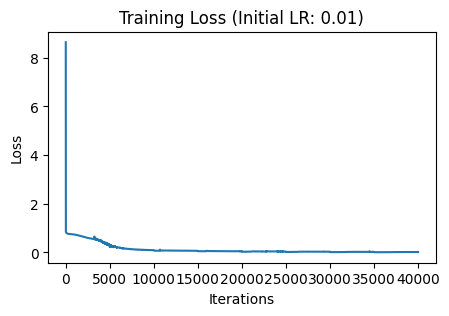

In [38]:
### START CODE HERE ###
x_train, y_train = generate_data()
loss_function = "mse"
layers_dims = [1, 32, 64, 64, 32, 1]
activation_fn = ['linear', 'relu', 'relu', 'relu', 'linear']
learning_rate = 0.01
num_iterations = 40000
print_loss = True
print_freq = 1000
decrease_freq = 5000
decrease_proportion = 0.9
# You don't necessarily need to use mini_batch in this part
batch_size = None

model = Model(layers_dims, activation_fn, loss_function)
model, losses, history = train_model(model, x_train, y_train, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)
### END CODE HERE ###

# Plot the loss
plt.figure(figsize=(5, 3))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training Loss (Initial LR: {learning_rate})')
plt.show()

> ### Step 3: Save prediction
Save your model's predictions to:
> * *Lab4_basic_regression.csv*
> * *Lab4_basic_regression.jpg*
> * *Lab4_basic_regression.gif*

Prediction data saved as 'Lab4_basic_regression.csv'


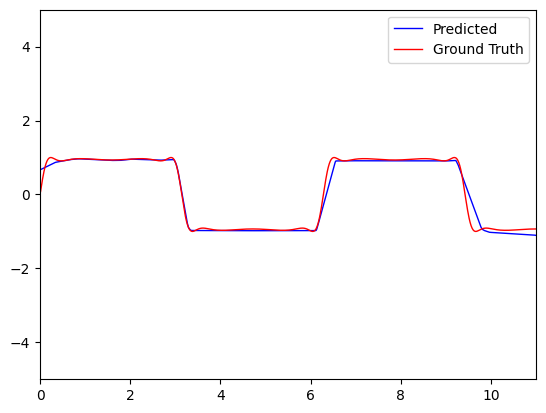

Prediction saved as 'Lab4_basic_regression.jpg'
Animation saved as 'Lab4_basic_regression.gif'


In [39]:
save_final_result(model, x_train, y_train)
animate_training(history, x_train, y_train)

## Part 3: Binary classification (10%)

You will train a model to perform binary classification. Your task is to predict whether an optical coherence tomography (OCT) image shows Choroidal Neovascularization (CNV) or is normal.

- Data: OCT scan image of retina
- Classes:
  - CNV: label = 1
  - Normal: label = 0

- Data Description:
  - Input: Grayscale images (28x28 pixels)
  - Training set size: 20000 images
  - Testing set size: 5000 images


> ### Step 1: Read data & split data
Load *basic_data.npz* and prepare it for training by splitting into training and validation sets.

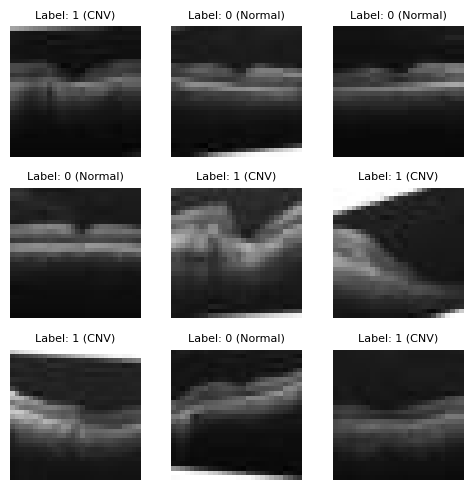

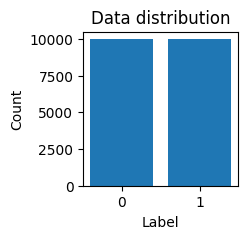

Train: x=(20000, 784), y=(20000, 1)
Test: x=(5000, 784)

After splitting:
x_train: (16000, 784) | y_train: (16000, 1)
x_val: (4000, 784) | y_val: (4000, 1)


In [40]:
# Load data
data = np.load('basic_data.npz')
X_train = data["x_train"]
Y_train = data["y_train"]
X_test = data["x_test"]

# Display sample images with labels
class_names_binary = {0: 'Normal', 1: 'CNV'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names_binary[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Data preprocessing
### START CODE HERE ###

# Normalize X data to [0,1] range
X_train = X_train / 255.0
X_test = X_test / 255.0
# Reshape Y_train to 2D array
Y_train = Y_train.reshape(-1, 1)
### END CODE HERE ###

# Plot data distribution
Y_train_1 = np.sum(Y_train == 1)
Y_train_0 = np.sum(Y_train == 0)
plt.figure(figsize=(2, 2))
plt.bar([0, 1], [Y_train_0, Y_train_1])
plt.title('Data distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

print('Train: x=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: x=%s' % (X_test.shape, ))

# Train-validation split
### START CODE HERE ###
# Choose the ratio for splitting
split_ratio = 0.8

# Split the data into training and validation sets
permutation = list(np.random.permutation(X_train.shape[0]))
shuffled_X = X_train[permutation]
shuffled_Y = Y_train[permutation]
x_train = shuffled_X[:int(X_train.shape[0] * split_ratio)]
y_train = shuffled_Y[:int(Y_train.shape[0] * split_ratio)]
x_val = shuffled_X[int(X_train.shape[0] * split_ratio):]
y_val = shuffled_Y[int(Y_train.shape[0] * split_ratio):]
### END CODE HERE ###

print("\nAfter splitting:")
print("x_train:", x_train.shape, "| y_train:", y_train.shape)
print("x_val:", x_val.shape, "| y_val:", y_val.shape)

> ### Step 2: Training and Evaluation
Train your model on the prepared OCT image data and evaluate its performance in distinguishing between CNV and normal retinal conditions.

Loss after iteration 0: 0.6747907449780758
Loss after iteration 8: 0.48104275575801375
Loss after iteration 16: 0.41056653793559456
Loss after iteration 24: 0.34574686368080115
Loss after iteration 32: 0.2838538532672802
Loss after iteration 40: 0.22850441380776337
Loss after iteration 48: 0.2020877839784094
Loss after iteration 56: 0.17780514333766967
Loss after iteration 64: 0.15345450153771054
Loss after iteration 72: 0.11374367599239554


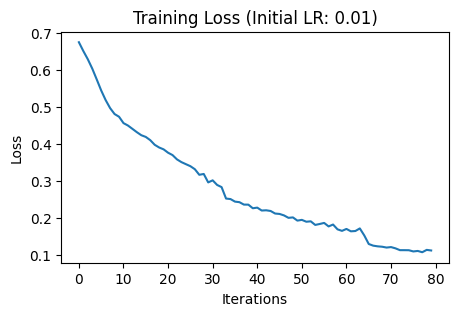

In [41]:
### START CODE HERE ###
loss_function = "cross_entropy"
layers_dims = [784, 1568, 784, 196, 1]
activation_fn = ['relu', 'relu', 'relu', 'sigmoid']
learning_rate = 0.01
num_iterations = 80
print_loss = True
print_freq = 8
decrease_freq = 32
decrease_proportion = 0.7
# You might need to use mini_batch to reduce training time in this part
batch_size = 64

model = Model(layers_dims, activation_fn, loss_function)
model, losses, history = train_model(model, x_train, y_train, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)
### END CODE HERE ###

# Plot the loss
plt.figure(figsize=(5, 3))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training Loss (Initial LR: {learning_rate})')
plt.show()

In [42]:
print('training------')
pred_train = predict(x_train, y_train, model)
print('validation------')
pred_val = predict(x_val, y_val, model)

training------
Accuracy: 97.47%
f1 score for each class: [0.97468354 0.97481611]
f1_macro score: 0.97
validation------
Accuracy: 91.15%
f1 score for each class: [0.91180867 0.91118916]
f1_macro score: 0.91


> ### Step 3: Save prediction
Save your model's predictions to: *Lab4_basic.csv*

In [43]:
pred_test = predict(X_test, None, model)
df = pd.DataFrame({
    'ID': range(len(pred_test)),
    'Label': pred_test.flatten()
})

df.to_csv('Lab4_basic.csv', index=False)
print("Prediction data saved as 'Lab4_basic.csv'")

Prediction data saved as 'Lab4_basic.csv'


# **Advanced Part (30%)**

You will train a model to perform multi-class classification on medical imaging data. Your task is to classify optical coherence tomography (OCT) images of retinal conditions into four different categories.

- Data: OCT scan images of retina
- Classes:
  - CNV (Choroidal Neovascularization): label = 0
  - DME (Diabetic Macular Edema): label = 1
  - Drusen: label = 2
  - Normal: label = 3

- Data Description:
  - Input: Grayscale images (28x28 pixels)
  - Training set size: 37754 images
  - Testing set size: 6997 images

**Notes:** You can implement other functions to improve your rankings

## Step 1: Read data & split data

Load *advanced_data.npz* and prepare it for training by splitting into training and validation sets.

Initial shapes:
Train: X=(37754, 784), Y=(37754,)
Test: X=(3000, 784)


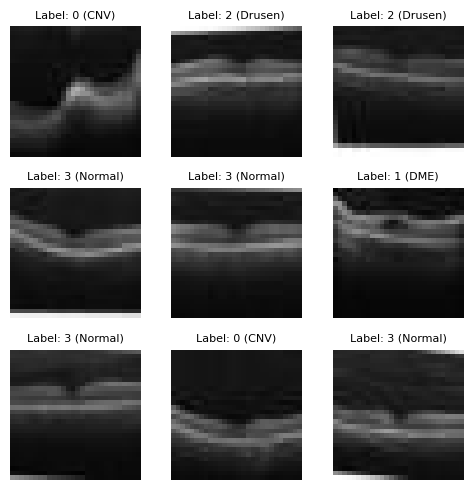


After preprocessing:
shape of X_train: (37754, 784)
shape of Y_train: (37754, 4)
shape of X_test: (3000, 784)


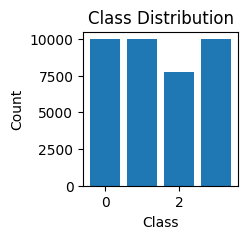


After splitting:
x_train: (30203, 784) | y_train: (30203, 4)
x_val: (7551, 784) | y_val: (7551, 4)


In [213]:
# Load data
data = np.load('advanced_data.npz')
X_train = data["x_train"]
Y_train = data["y_train"]
X_test = data["x_test"]

print(f'Initial shapes:')
print(f'Train: X={X_train.shape}, Y={Y_train.shape}')
print(f'Test: X={X_test.shape}')

# Display sample images with labels
class_names = {0: 'CNV', 1: 'DME', 2: 'Drusen', 3: 'Normal'}
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {int(Y_train[i])} ({class_names[int(Y_train[i])]})', fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Data preprocessing
### START CODE HERE ###
# Convert labels to one-hot encoding
num_classes = 4  # OCT has 4 classes
Y_train = np.eye(num_classes)[Y_train]

# Normalize X data to [0,1] range
X_train = X_train / 255.0
X_test = X_test / 255.0
### END CODE HERE ###

print("\nAfter preprocessing:")
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)

# Plot class distribution before splitting
orig_labels = np.argmax(Y_train, axis=1)
unique, counts = np.unique(orig_labels, return_counts=True)
plt.figure(figsize=(2, 2))
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Train-validation split
### START CODE HERE ###
# Choose the ratio for splitting
split_ratio = 0.8

# Split the data into training and validation sets
permutation = list(np.random.permutation(X_train.shape[0]))
shuffled_X = X_train[permutation]
shuffled_Y = Y_train[permutation]
# y_train_g0 = shuffled_Y[shuffled_Y[:, 0] == 1]
# y_train_g1 = shuffled_Y[shuffled_Y[:, 1] == 1]
# y_train_g2 = shuffled_Y[shuffled_Y[:, 2] == 1]
# y_train_g3 = shuffled_Y[shuffled_Y[:, 3] == 1]
# x_train_g0 = shuffled_X[shuffled_Y[:, 0] == 1]
# x_train_g1 = shuffled_X[shuffled_Y[:, 1] == 1]
# x_train_g2 = shuffled_X[shuffled_Y[:, 2] == 1]
# x_train_g3 = shuffled_X[shuffled_Y[:, 3] == 1]
# pivot = int(min(x_train_g0.shape[0], x_train_g1.shape[0], x_train_g2.shape[0], x_train_g3.shape[0]) * split_ratio)
# x_train = np.concatenate((x_train_g0[:pivot], x_train_g1[:pivot], x_train_g2[:pivot], x_train_g3[:pivot]))
# y_train = np.concatenate((y_train_g0[:pivot], y_train_g1[:pivot], y_train_g2[:pivot], y_train_g3[:pivot]))
# x_val = np.concatenate((x_train_g0[pivot:], x_train_g1[pivot:], x_train_g2[pivot:], x_train_g3[pivot:]))
# y_val = np.concatenate((y_train_g0[pivot:], y_train_g1[pivot:], y_train_g2[pivot:], y_train_g3[pivot:]))
x_train = shuffled_X[:int(X_train.shape[0] * split_ratio)]
y_train = shuffled_Y[:int(Y_train.shape[0] * split_ratio)]
x_val = shuffled_X[int(X_train.shape[0] * split_ratio):]
y_val = shuffled_Y[int(Y_train.shape[0] * split_ratio):]
### END CODE HERE ###

print("\nAfter splitting:")
print("x_train:", x_train.shape, "| y_train:", y_train.shape)
print("x_val:", x_val.shape, "| y_val:", y_val.shape)

## Step 2: Training and Evaluation

Loss after iteration 0: 1.2964307632072638
Validation f1_macro score after iteration 0: 1.2097437613252668
Loss after iteration 4: 0.961121552750409
Validation f1_macro score after iteration 4: 0.9859776562135558
Loss after iteration 8: 0.7976432083536846
Validation f1_macro score after iteration 8: 0.8285544582525871
Loss after iteration 12: 0.6797649914807481
Validation f1_macro score after iteration 12: 0.7507179693133421
Loss after iteration 16: 0.589483197641424
Validation f1_macro score after iteration 16: 0.8689236425726365
Loss after iteration 20: 0.4322898114792487
Validation f1_macro score after iteration 20: 0.6243457055574921
Loss after iteration 24: 0.3695632923331266
Validation f1_macro score after iteration 24: 0.687897528213558
Loss after iteration 28: 0.3209482499062042
Validation f1_macro score after iteration 28: 0.6395930973704377
Loss after iteration 32: 0.28226491139404164
Validation f1_macro score after iteration 32: 0.5575594192212767
Loss after iteration 36: 0.

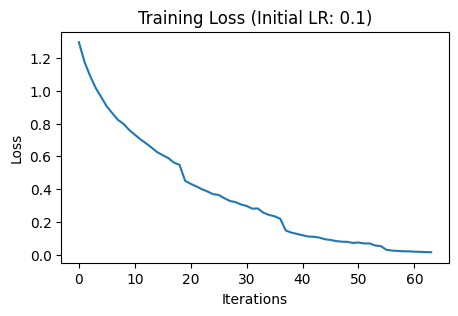

In [ ]:
### START CODE HERE ###
loss_function = "cross_entropy"
layers_dims = [784, 1568, 784, 196, 4]
activation_fn = ['relu', 'relu', 'relu', 'softmax']
learning_rate = 0.1
num_iterations = 64
print_loss = True
print_freq = 4
decrease_freq = 20
decrease_proportion = 0.7
batch_size = 64

model = Model(layers_dims, activation_fn, loss_function)
model, losses, history = train_model(model, x_train, y_train, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion, x_val, y_val)
### END CODE HERE ###

# Plot the loss
plt.figure(figsize=(5, 3))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training Loss (Initial LR: {learning_rate})')
plt.show()

min index: 38
min value: 0.528569187228037


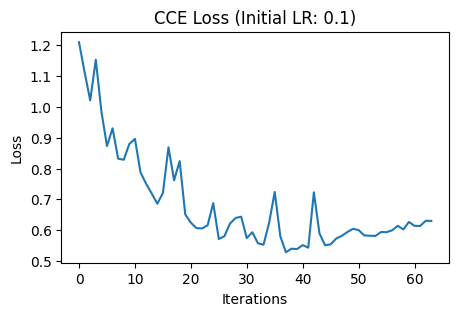

In [264]:
# Plot the loss
validationLoss = np.array(predictionLoss)
min_idx = np.argmin(validationLoss)
show_min = f"min index: {min_idx + 1}\nmin value: {validationLoss[min_idx]}"
print(show_min)
plt.figure(figsize=(5, 3))
plt.plot(predictionLoss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'CCE Loss (Initial LR: {learning_rate})')
plt.show()

In [265]:
print('training------')
pred_train = predict(x_train, y_train, model)
print('validation------')
pred_val = predict(x_val, y_val, model)

training------
Accuracy: 99.85%
f1 score for each class: [0.99830519 0.99943697 0.99711307 0.99900125]
f1_macro score: 1.00
validation------
Accuracy: 86.15%
f1 score for each class: [0.89809684 0.92110553 0.73128665 0.85854617]
f1_macro score: 0.85


## Step 3: Save prediction
Save your model's predictions to: *Lab4_advanced.csv*

In [266]:
pred_test = predict(X_test, None, model)
df = pd.DataFrame({
    'ID': range(len(pred_test)),
    'Label': pred_test.flatten()
})

df.to_csv('Lab4_advanced.csv', index=False)
print("Prediction data saved as 'Lab4_advanced.csv'")

Prediction data saved as 'Lab4_advanced.csv'


# Save outputs
Save the outputs of your testing codes to: *Lab4_output.npy*

We will test your *Lab4_output.npy* to verify the correctness of your neural networks.

In [267]:
# sanity check
assert list(outputs.keys()) == [
    'dense_forward',
    'dense_backward',
    'dense_update_parameters',
    'sigmoid',
    'relu',
    'softmax',
    'linear',
    'sigmoid_backward',
    'relu_backward',
    'softmax_backward',
    'linear_backward',
    'model_forward_sigmoid',
    'model_forward_relu',
    'model_forward_softmax',
    'model_backward_sigmoid',
    'model_backward_relu',
    'model_update_parameters',
    'compute_BCE_loss',
    'compute_CCE_loss'
], "You're missing something, please restart the kernel and run the code from beginning to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [268]:
np.save("Lab4_output.npy", outputs)

# sanity check for saved outputs
submit = np.load("Lab4_output.npy", allow_pickle=True).item()
for key, value in submit.items():
    print(f"{key}: {type(value)}")

dense_forward: <class 'tuple'>
dense_backward: <class 'tuple'>
dense_update_parameters: <class 'dict'>
sigmoid: <class 'tuple'>
relu: <class 'tuple'>
softmax: <class 'tuple'>
linear: <class 'tuple'>
sigmoid_backward: <class 'numpy.ndarray'>
relu_backward: <class 'numpy.ndarray'>
softmax_backward: <class 'numpy.ndarray'>
linear_backward: <class 'numpy.ndarray'>
model_forward_sigmoid: <class 'tuple'>
model_forward_relu: <class 'tuple'>
model_forward_softmax: <class 'tuple'>
model_backward_sigmoid: <class 'tuple'>
model_backward_relu: <class 'tuple'>
model_update_parameters: <class 'dict'>
compute_BCE_loss: <class 'numpy.float64'>
compute_CCE_loss: <class 'numpy.float64'>
